## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Importing the dataset

In [ ]:
train = pd.read_csv("optdigits.tra", header=None)
test = pd.read_csv("optdigits.tes", header=None)

##Feature Cleaning

In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values

X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)


===== Linear Kernel =====
Accuracy: 0.9594
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       178
           1       0.92      0.97      0.94       182
           2       0.97      0.97      0.97       177
           3       0.95      0.94      0.95       183
           4       0.97      0.99      0.98       181
           5       0.94      0.98      0.96       182
           6       0.98      0.98      0.98       181
           7       0.99      0.93      0.96       179
           8       0.95      0.91      0.93       174
           9       0.94      0.92      0.93       180

    accuracy                           0.96      1797
   macro avg       0.96      0.96      0.96      1797
weighted avg       0.96      0.96      0.96      1797



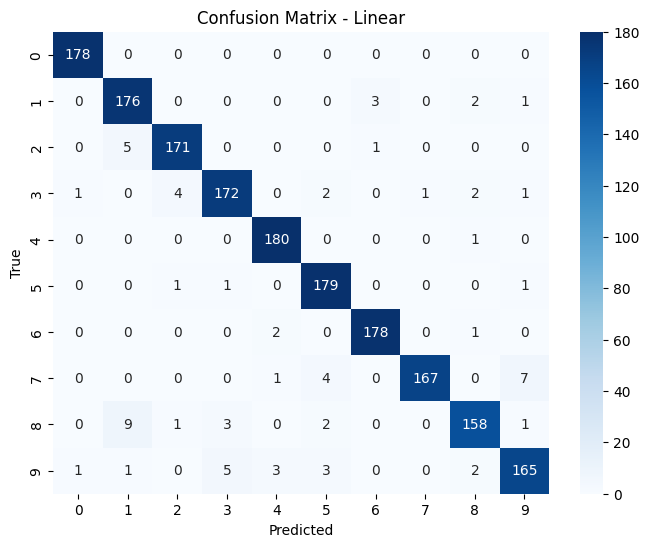

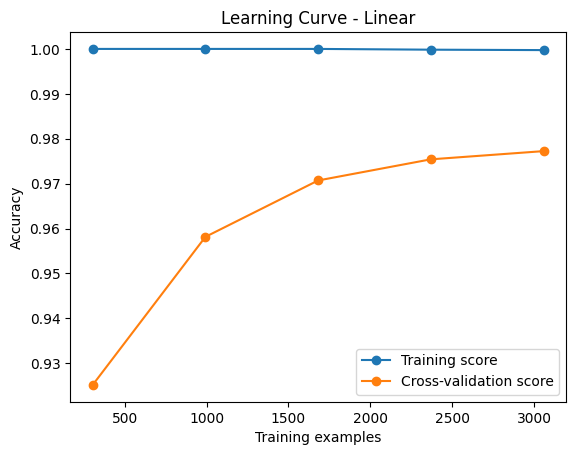

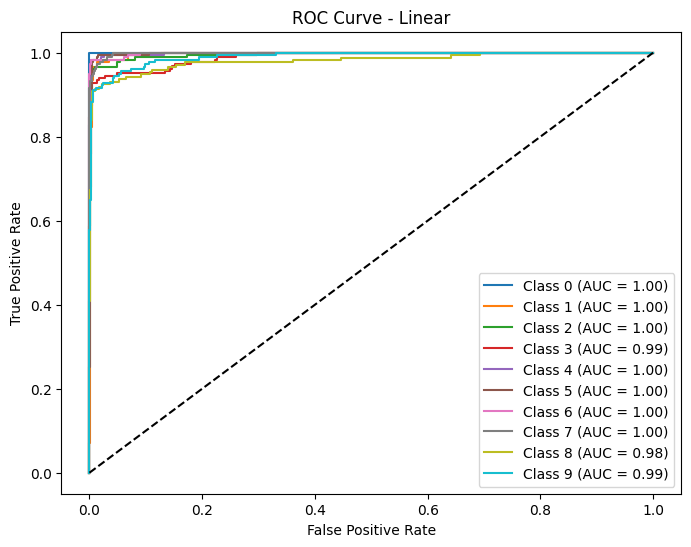


===== Polynomial Kernel =====
Accuracy: 0.9622
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.96      0.99      0.98       182
           2       0.99      0.94      0.97       177
           3       0.99      0.93      0.96       183
           4       1.00      0.98      0.99       181
           5       0.97      0.99      0.98       182
           6       1.00      0.97      0.98       181
           7       1.00      0.94      0.97       179
           8       0.80      0.97      0.88       174
           9       0.94      0.92      0.93       180

    accuracy                           0.96      1797
   macro avg       0.97      0.96      0.96      1797
weighted avg       0.97      0.96      0.96      1797



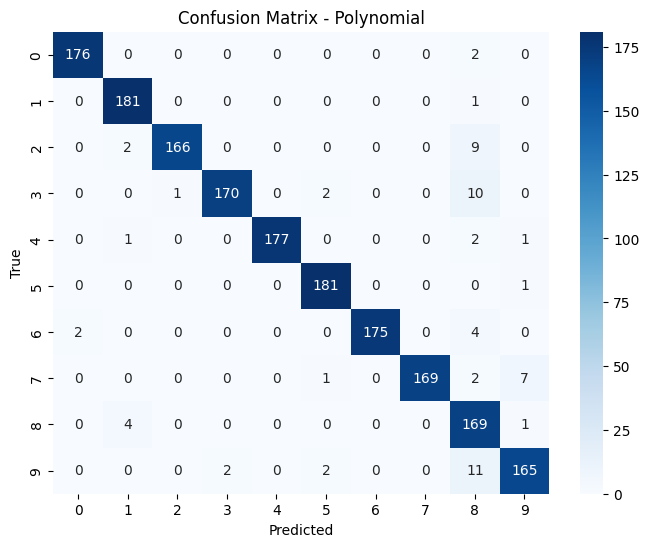

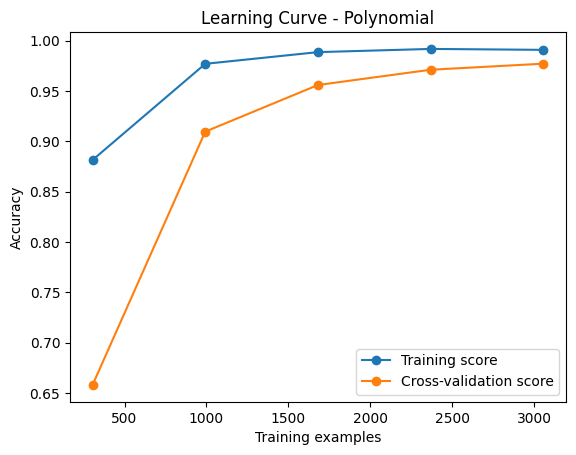

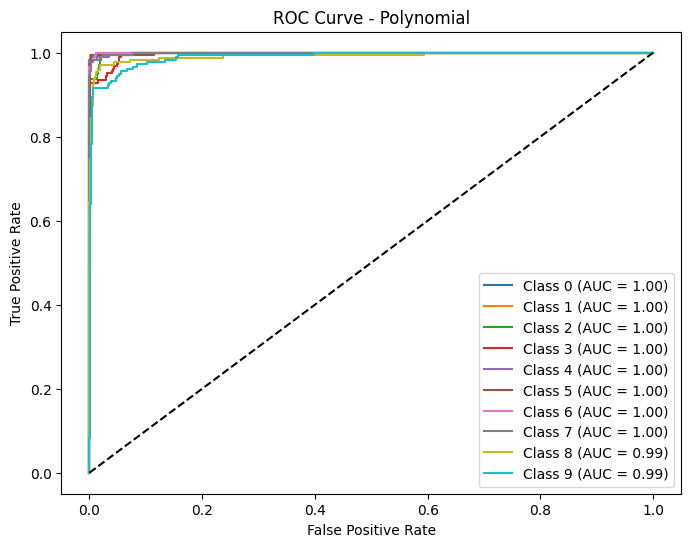


===== RBF (Gaussian) Kernel =====
Accuracy: 0.9677
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.92      0.98      0.95       182
           2       0.98      0.94      0.96       177
           3       0.99      0.95      0.97       183
           4       0.94      0.99      0.96       181
           5       0.98      0.99      0.99       182
           6       0.99      0.99      0.99       181
           7       0.99      0.96      0.97       179
           8       0.98      0.91      0.94       174
           9       0.92      0.97      0.94       180

    accuracy                           0.97      1797
   macro avg       0.97      0.97      0.97      1797
weighted avg       0.97      0.97      0.97      1797



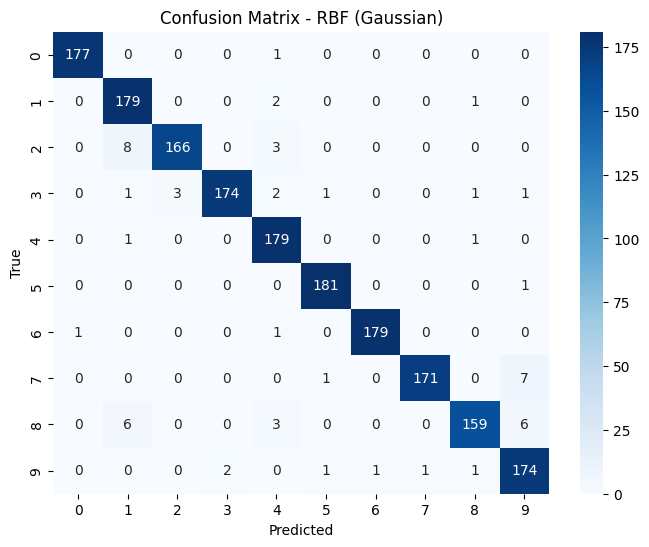

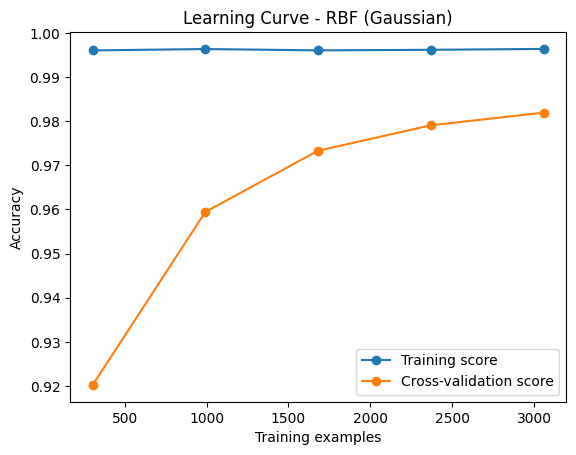

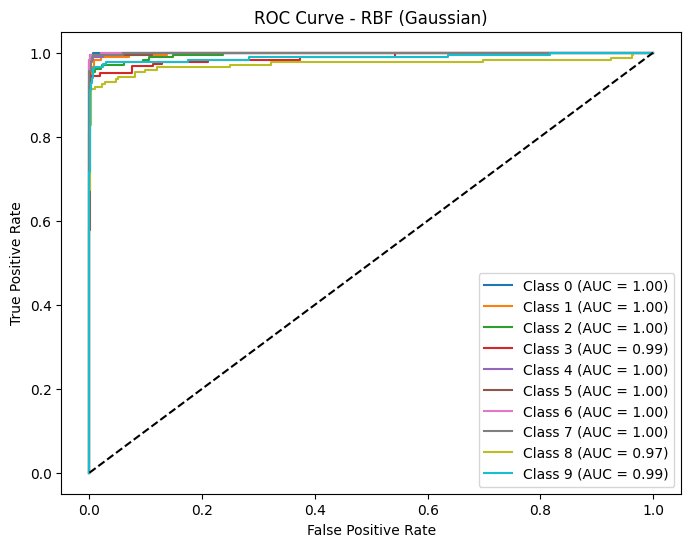


===== Sigmoid Kernel =====
Accuracy: 0.9199
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.83      0.81      0.82       182
           2       0.83      0.92      0.87       177
           3       0.99      0.90      0.94       183
           4       0.88      0.98      0.92       181
           5       0.93      0.94      0.94       182
           6       1.00      0.97      0.99       181
           7       0.96      0.91      0.94       179
           8       0.93      0.89      0.91       174
           9       0.88      0.91      0.89       180

    accuracy                           0.92      1797
   macro avg       0.92      0.92      0.92      1797
weighted avg       0.92      0.92      0.92      1797



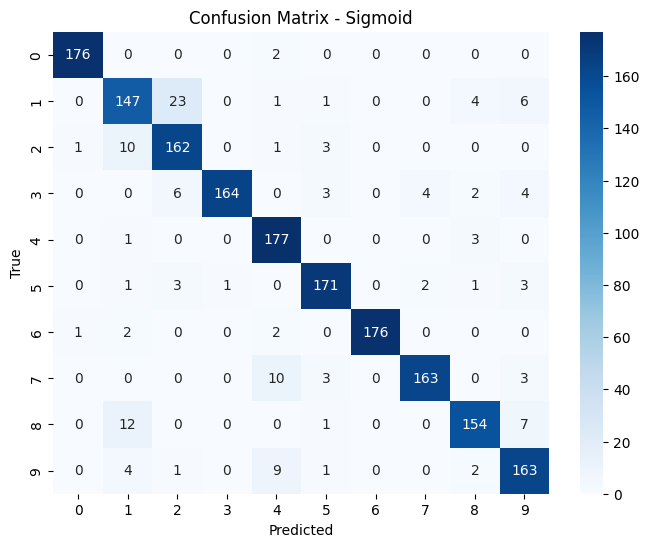

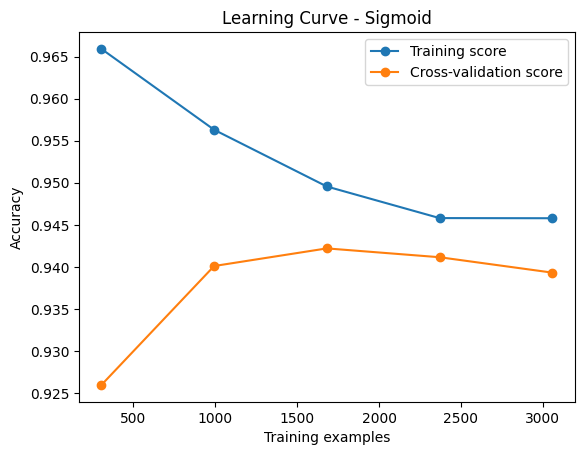

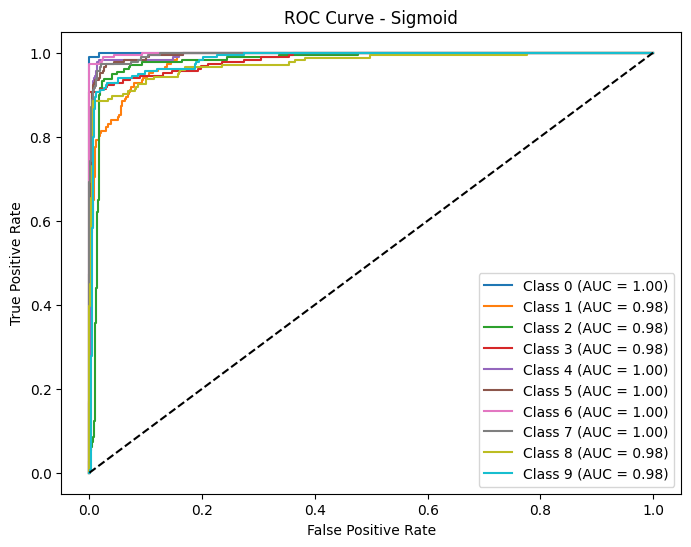


=== Performance Summary ===
           Kernel  Accuracy
0          Linear  0.959377
1      Polynomial  0.962159
2  RBF (Gaussian)  0.967724
3         Sigmoid  0.919866


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import learning_curve

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.show()

def plot_roc_curve_multiclass(estimator, X_test, y_test, title):
    n_classes = len(np.unique(y_test))
    y_score = estimator.decision_function(X_test)
    y_bin = label_binarize(y_test, classes=list(range(n_classes)))

    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(8,6))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# ---------------------------
# 3. Train & evaluate SVMs
# ---------------------------
kernels = {
    "Linear": SVC(kernel='linear', C=1, random_state=42),
    "Polynomial": SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42),
    "RBF (Gaussian)": SVC(kernel='rbf', C=1, gamma='scale', random_state=42),
    "Sigmoid": SVC(kernel='sigmoid', C=1, gamma='scale', random_state=42)
}

results = []

for name, model in kernels.items():
    print(f"\n===== {name} Kernel =====")

    # Train
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Accuracy & classification report
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Save results
    results.append({"Kernel": name, "Accuracy": acc})

    # Plots
    plot_confusion_matrix(y_test, y_pred, name)
    plot_learning_curve(model, X_train_scaled, y_train, name)
    plot_roc_curve_multiclass(model, X_test_scaled, y_test, name)

# ---------------------------
# 4. Summary table
# ---------------------------
results_df = pd.DataFrame(results)
print("\n=== Performance Summary ===")
print(results_df)

PCA reduced dimensions: 41

===== Linear Kernel with PCA =====
Accuracy: 0.9538
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       178
           1       0.90      0.97      0.93       182
           2       0.97      0.95      0.96       177
           3       0.96      0.94      0.95       183
           4       0.96      0.99      0.98       181
           5       0.94      0.99      0.96       182
           6       0.98      0.98      0.98       181
           7       0.99      0.91      0.95       179
           8       0.96      0.90      0.93       174
           9       0.91      0.91      0.91       180

    accuracy                           0.95      1797
   macro avg       0.95      0.95      0.95      1797
weighted avg       0.95      0.95      0.95      1797



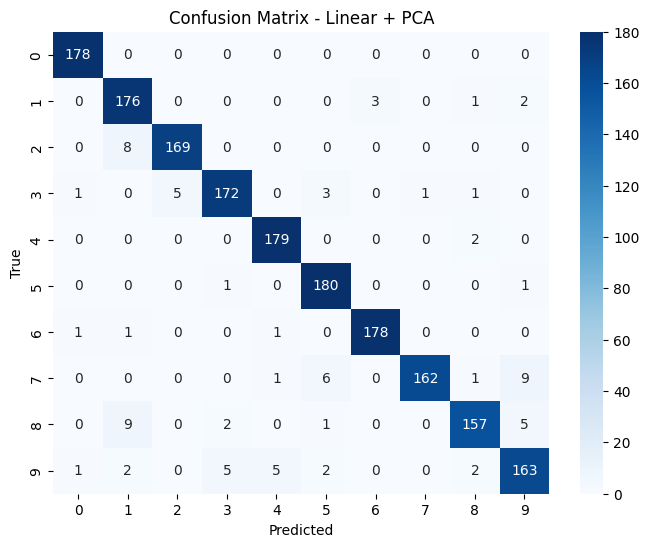

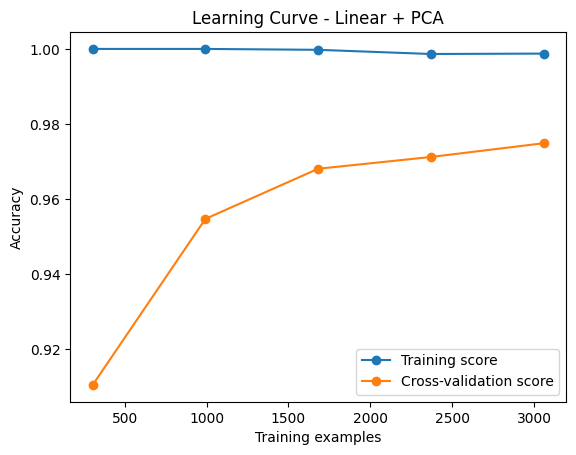

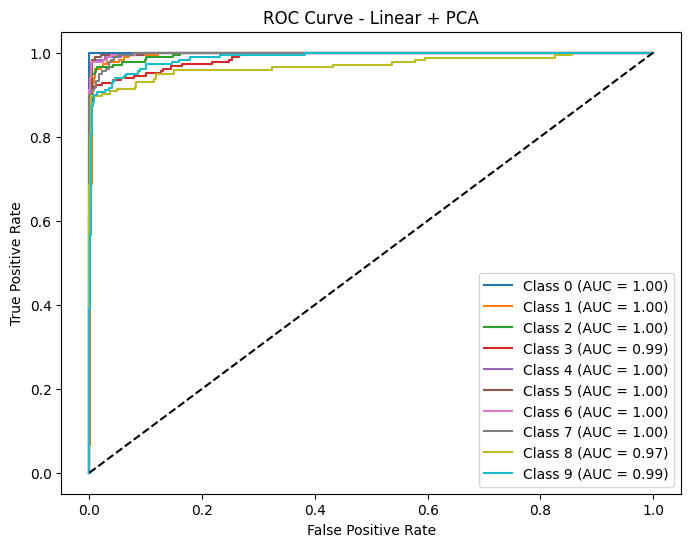


===== Polynomial Kernel with PCA =====
Accuracy: 0.9622
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.95      0.99      0.97       182
           2       0.99      0.95      0.97       177
           3       0.99      0.92      0.95       183
           4       0.99      0.98      0.99       181
           5       0.98      0.99      0.99       182
           6       0.99      0.97      0.98       181
           7       1.00      0.94      0.97       179
           8       0.81      0.97      0.88       174
           9       0.95      0.91      0.93       180

    accuracy                           0.96      1797
   macro avg       0.97      0.96      0.96      1797
weighted avg       0.97      0.96      0.96      1797



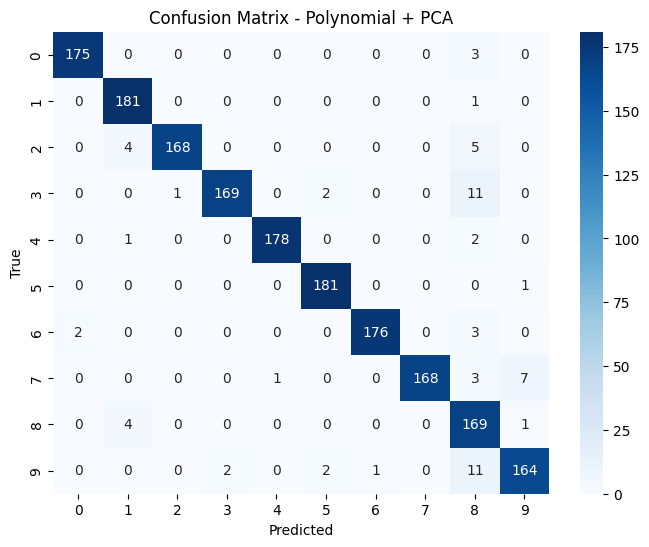

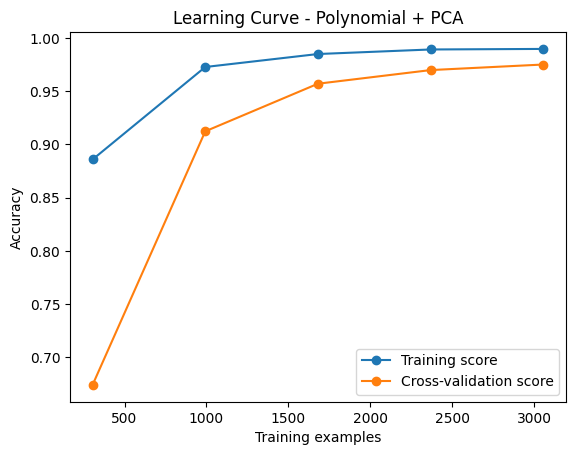

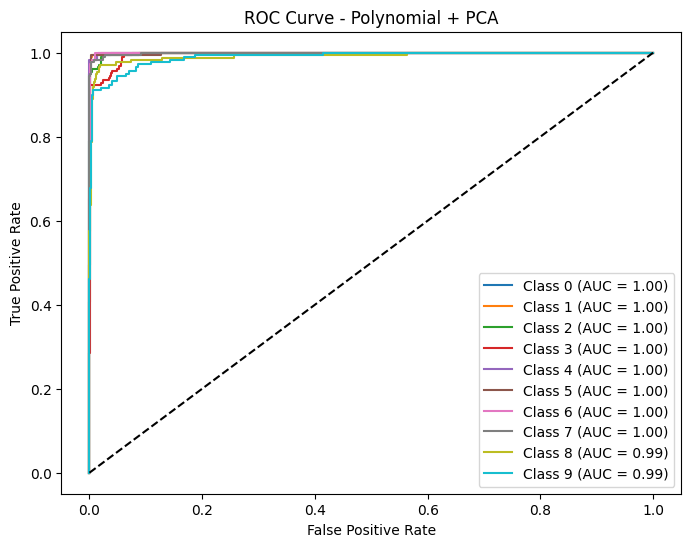


===== RBF (Gaussian) Kernel with PCA =====
Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.92      0.98      0.95       182
           2       0.97      0.94      0.95       177
           3       0.99      0.93      0.96       183
           4       0.94      0.99      0.96       181
           5       0.98      0.99      0.99       182
           6       0.99      0.99      0.99       181
           7       0.99      0.95      0.97       179
           8       0.98      0.91      0.94       174
           9       0.90      0.97      0.93       180

    accuracy                           0.96      1797
   macro avg       0.97      0.96      0.96      1797
weighted avg       0.97      0.96      0.97      1797



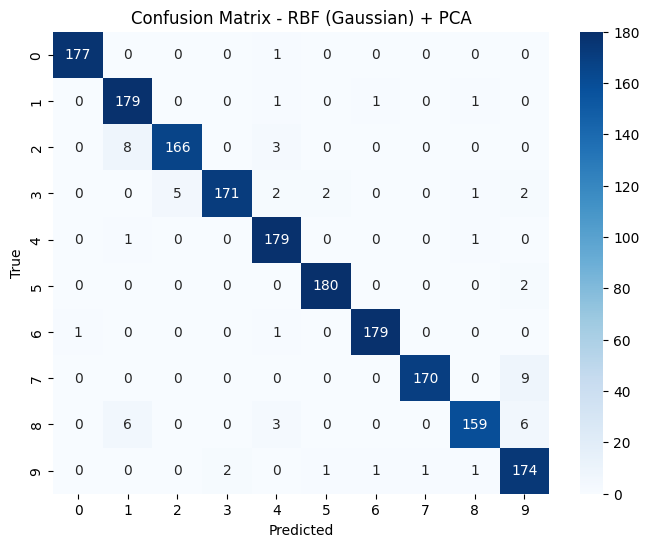

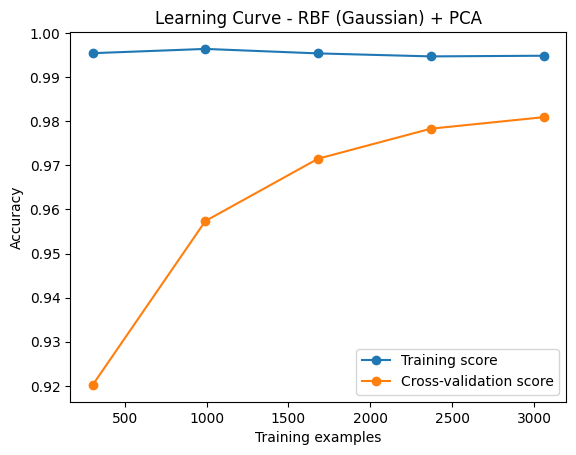

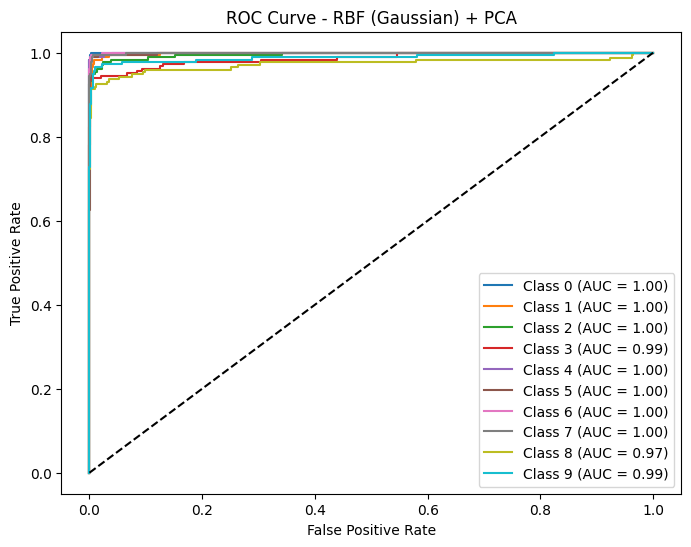


===== Sigmoid Kernel with PCA =====
Accuracy: 0.9121
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.78      0.81      0.79       182
           2       0.80      0.92      0.85       177
           3       1.00      0.91      0.95       183
           4       0.87      0.97      0.92       181
           5       0.93      0.93      0.93       182
           6       0.99      0.98      0.99       181
           7       0.96      0.90      0.93       179
           8       0.93      0.84      0.89       174
           9       0.90      0.88      0.89       180

    accuracy                           0.91      1797
   macro avg       0.92      0.91      0.91      1797
weighted avg       0.92      0.91      0.91      1797



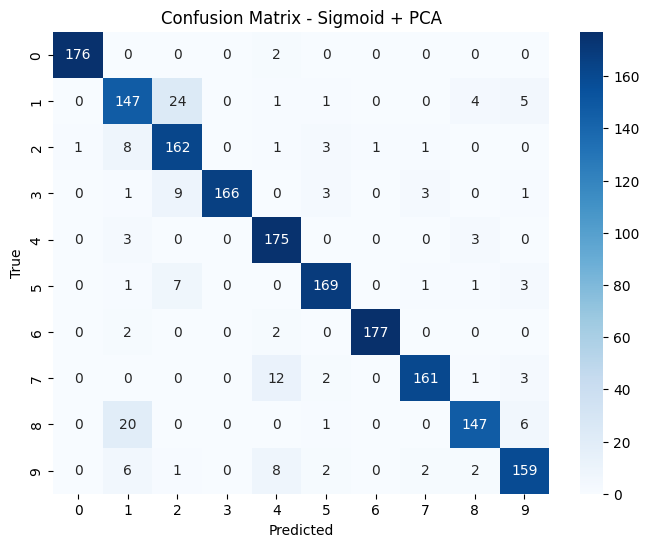

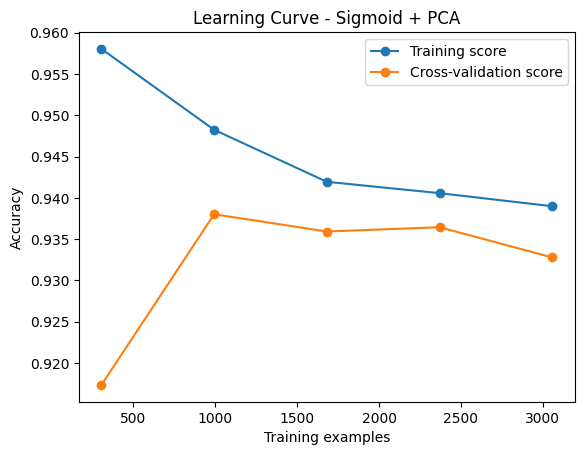

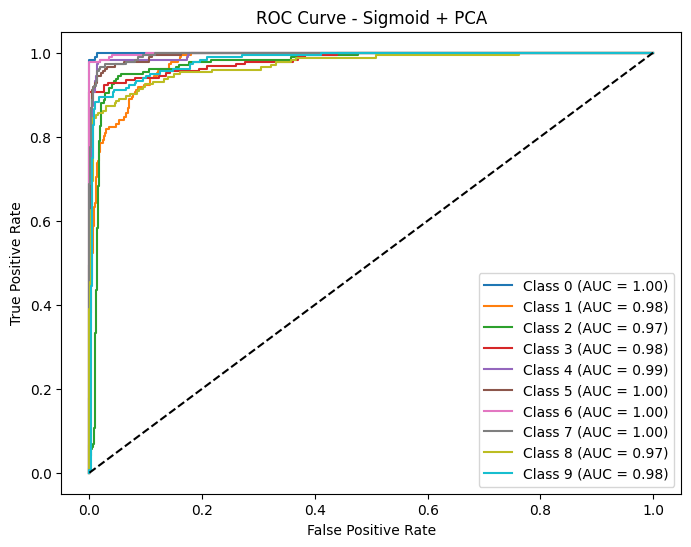


=== PCA Performance Summary ===
           Kernel  Accuracy
0          Linear  0.953812
1      Polynomial  0.962159
2  RBF (Gaussian)  0.964942
3         Sigmoid  0.912076


In [ ]:
from sklearn.decomposition import PCA

# PCA to preserve 95% of variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA reduced dimensions: {X_train_pca.shape[1]}")

results_pca = []

for name, model in kernels.items():
    print(f"\n===== {name} Kernel with PCA =====")

    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    results_pca.append({"Kernel": name, "Accuracy": acc})

    plot_confusion_matrix(y_test, y_pred, f"{name} + PCA")
    plot_learning_curve(model, X_train_pca, y_train, f"{name} + PCA")
    plot_roc_curve_multiclass(model, X_test_pca, y_test, f"{name} + PCA")

# Summary of PCA results
results_pca_df = pd.DataFrame(results_pca)
print("\n=== PCA Performance Summary ===")
print(results_pca_df)